# Project 1

## Task 1.1 - Data Exploration and Pre-processing 

#### Importing necessary libraries and functions

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_absolute_error

#### Importing the datasets
Dataset 1: JNSM_KV_flashcrowd_1, 
Dataset 2: JNSM_VoD_flashcrowd_1

In [12]:
#Reading the data
X_KV = pd.read_csv('../X_KV.csv')   #JNSM_KV_flashcrowd_1 design matrix
Y_KV = pd.read_csv('../Y_KV.csv')   #JNSM_KV_flashcrowd_1 target values
X_VoD = pd.read_csv('../X_VoD.csv') #JNSM_VoD_flashcrowd_1 design matrix 
Y_VoD = pd.read_csv('../Y_VoD.csv') #JNSM_VoD_flashcrowd_1 target values

#Remove the first two columns that index the samples and retrieve all other values by using iloc()
X_KV = X_KV.iloc[:,2:]  
Y_KV = Y_KV.iloc[:, 2:] 
X_VoD = X_VoD.iloc[:,2:]
Y_VoD = Y_VoD.iloc[:, 2:]

### Task 1.1: Describe the Dataset
Describe the data set in terms of number of samples, number of features. For the target values, compute
the average and the standard deviation. Further, provide the density plot of the target values.

In [4]:
#One may use the .describe() function to obtain all of the information below. I chose to do it manually. 

#Number of samples and features
nr_KV_samples = X_KV.shape[0] #Number of samples  of JNSM_KV_flashcrowd_1
nr_KV_features = X_KV.shape[1] #Number of features of JNSM_KV_flashcrowd_1
nr_VoD_samples = X_VoD.shape[0] 
nr_VoD_features = X_VoD.shape[1] 
 
#Mean and std of all the target values 
mean_Y_KV = np.mean(Y_KV,axis=0)
std_Y_KV = np.std(Y_KV,axis=0)
mean_Y_VoD = np.mean(Y_VoD,axis=0)
std_Y_VoD = np.std(Y_VoD,axis=0)

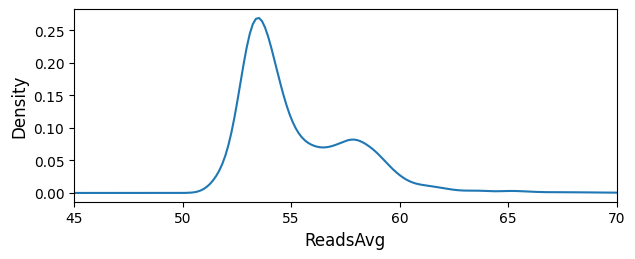

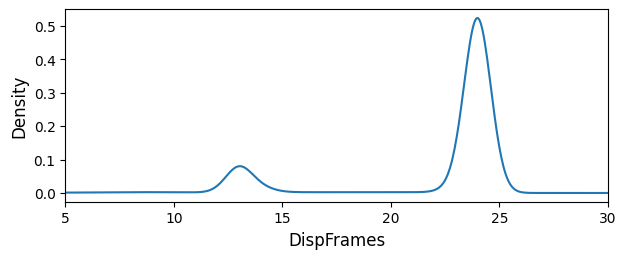

In [23]:
#Density plots

plt.figure(figsize=(7, 2.5))
Y_KV.ReadsAvg.plot.density()
#plt.legend(['ReadsAvg'],loc='upper left',fontsize=11)
plt.xlabel('ReadsAvg',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.xlim([45, 70])
#plt.savefig('density_y_KV', bbox_inches='tight')
plt.show()

plt.figure(figsize=(7, 2.5))
Y_VoD['DispFrames'].plot.density()
#plt.legend(['DispFrames'],fontsize=11)
plt.xlabel('DispFrames',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.xlim([5, 30])
#plt.savefig('density_y_VoD', bbox_inches='tight')
plt.show()

### Task 1.2: Pre-process the data
Pre-process the data using the three methods below on the columns first and then on the sample rows.
This step produces six design matrices X1, X2, ..., X6 as numpy arrays.

(a) l2 Normalization: linearly scale the values of each feature column (or sample row) so that its l2
-norm becomes 1.

(b) Restriction to interval: linearly map the values of each feature column (or sample row) so that all
they lie within the interval [0,1].

(c) Standardization: linearly map the values of each feature column (or sample row) so that they
have 0 mean and a variance of 1.

In [24]:
# a) l2 normalisation
X_KV_columns_l2norm = normalize(X_KV.T, norm='l2').T #Normalizer acts on the samples, so we need to transpose  
X_KV_rows_l2norm = normalize(X_KV, norm='l2') #Normaliszing the samples

X_VoD_columns_l2norm = normalize(X_VoD.T, norm='l2').T
X_VoD_rows_l2norm = normalize(X_VoD, norm='l2')

# b) Restriction to the interval
min_max_scaler = MinMaxScaler()

X_KV_columns_range = min_max_scaler.fit_transform(X_KV) #Min_Max Scaler() maps each column to the interval [0,1]
X_KV_rows_range = min_max_scaler.fit_transform(X_KV.T).T #Row-wise scaling requires transpose

X_VoD_columns_range = min_max_scaler.fit_transform(X_VoD)
X_VoD_rows_range = min_max_scaler.fit_transform(X_VoD.T).T

# c) Standardization
scaler = StandardScaler()

X_KV_columns_scaled = scaler.fit_transform(X_KV) #StandardScaler() standardizes column-wise
X_KV_rows_scaled = scaler.fit_transform(X_KV.T).T #Row-wise scaling requires transpose

X_VoD_columns_scaled = scaler.fit_transform(X_VoD)
X_VoD_rows_scaled = scaler.fit_transform(X_VoD.T).T

### Task 1.3
Reduce the original data set as follows. Use a tree-based method to select the top 16 features. Create
a correlation matrix of X and Y columns. This is a square matrix whose cells show the correlation
between two features or between a feature and the target Y . Plot a heatmap of the correlation matrix.
Describe and comment on your observations of this matrix. You will use the reduced data set in Task
II.

In [25]:
#Using DecisionTreeRegressor() because RandomForestRegressor() is taking too long on my device.
sfm_KV = SelectFromModel(estimator=DecisionTreeRegressor(), max_features=16).fit(X_KV, Y_KV['ReadsAvg'])
sfm_KV.estimator_.feature_importances_
feature_index_KV = np.array(range(nr_KV_features)) #Features are specified by their position in the design matrix starting from 0

print(f"Top 16 features for JNSM_KV_flashcrowd_1: {feature_index_KV[sfm_KV.get_support()]}") 

#Actual names of the top 16 features
feature_names_KV = [list(X_KV.columns)[i] for i in feature_index_KV[sfm_KV.get_support()]]

Top 16 features for JNSM_KV_flashcrowd_1: [  69  165  234  292  531  682  741  750  979  991  996 1004 1239 1399
 1554 1561]


In [27]:
Y_VoD_DispFrames = np.array(Y_VoD['DispFrames']).reshape(-1,1) #Values of "DispFrames"

sfm_VoD = SelectFromModel(estimator=DecisionTreeRegressor(), max_features=16).fit(X_VoD, Y_VoD['DispFrames'])
sfm_VoD.estimator_.feature_importances_
feature_index_VoD = np.array(range(nr_VoD_features))
print(f"Top 16 features for JNSM_VoD_flashcrowd_1: {feature_index_VoD[sfm_VoD.get_support()]}")

#Actual names of the top 16 features
feature_names_VoD = [list(X_VoD.columns)[i] for i in feature_index_VoD[sfm_VoD.get_support()]]

Top 16 features for JNSM_VoD_flashcrowd_1: [ 148  606  614  853  866  883 1010 1043 1061 1081 1091 1148 1334 1357
 1476 1481]


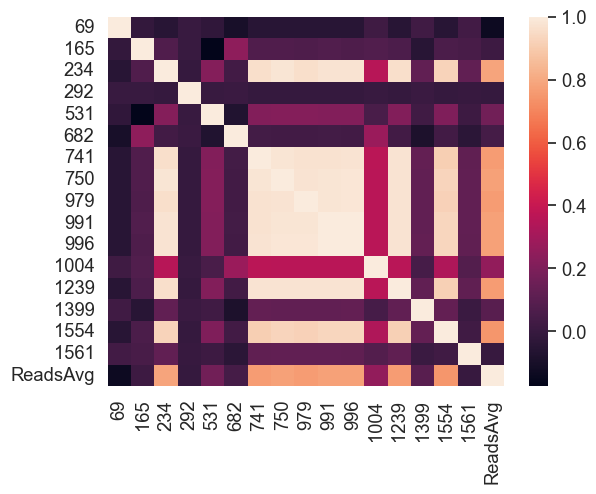

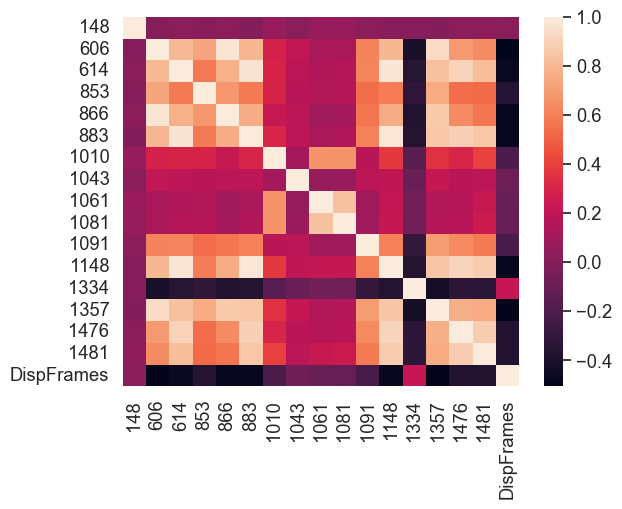

In [31]:
#New design matrices reduced to the top 16 features
X_KV_new = sfm_KV.transform(X_KV)
X_VoD_new = sfm_VoD.transform(X_VoD)

#Concatenate the new design matrices with the targets Y
KV_new_concatenated = np.concatenate((X_KV_new, Y_KV.loc[:,['ReadsAvg']]), axis=1)
VoD_new_concatenated = np.concatenate((X_VoD_new, Y_VoD.loc[:,['DispFrames']]), axis=1)

KV_corr = pd.DataFrame(KV_new_concatenated) #Concatenate the features and the target values into one matrix
KV_corr_matrix = KV_corr.corr() #Correlation matrix
VoD_corr = pd.DataFrame(VoD_new_concatenated)
VoD_corr_matrix = VoD_corr.corr()

#Heatmaps
#sns.set(font_scale=1.2) #Fontsize

axis_KV = feature_index_KV[sfm_KV.get_support()].tolist() + ['ReadsAvg']
sns.heatmap(KV_corr_matrix,xticklabels=axis_KV, yticklabels=axis_KV) #Axis are indexed by feature indices and targets
#plt.title('Heatmap related to JNSM_KV_flashcrowd_1')
plt.savefig('heatmap_KV', bbox_inches='tight')
plt.show()

axis_VoD = feature_index_VoD[sfm_VoD.get_support()].tolist() + ['DispFrames']
sns.heatmap(VoD_corr_matrix, xticklabels=axis_VoD, yticklabels=axis_VoD)
#plt.title('Heatmap related to JNSM_VoD_flashcrowd_1')
plt.savefig('heatmap_VoD', bbox_inches='tight')
plt.show()

### Quiz 1

In [ ]:
np.set_printoptions(precision=2)
X = np.array([[2,5,8,1], [10,2,12,1], [4,3,2,1]])
Y = np.array([7,2,6]).T
z = np.array([1,3,1,1])

x_1 = X[0] #Training sample 1
x_2 = X[1] #Training sample 2
x_3 = X[2] #Training sample 3

X_pseudo = np.linalg.pinv(X) #Moore-Penrose Pseudo inverse
parameters = np.matmul(X_pseudo,Y) #Model parameters after fitting 

y_pred = np.matmul(X,parameters)
Mean_abs_error = mean_absolute_error(Y, y_pred)
NMAE = (1/3)*Mean_abs_error

y_1 = np.matmul(x_1,parameters)
y_2 = np.matmul(x_2,parameters)
y_3 = np.matmul(x_3,parameters)

print('Parameters: %s' %parameters)
print('Prediction for sample z: %s' %np.matmul(z,parameters))
print('Mean absolute error: %s' %NMAE)

